# Chlorophyll in-situ data
<br>Dataset assembled by: Gianna Milton (NOAA)

This is mainly from the Florida coasts.


In [15]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/"
    "fish-pace/fish-pace-datasets/main/"
    "datasets/chla_insitu/data/insitu_chl_usa_2025.csv"
)

df = pd.read_csv(url)
print(f'number of rows: {len(df)}')
df.head()

number of rows: 789


,datetime,lat,lon,chl,depth,station,cruise,experiment,affiliations,doi,source,fluorescence?,pressure,FishRegion
0,2024-10-02 17:04:01,34.0831,-120.003,3.446360,0.0,7,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,no,NaN,West Coast
1,2024-10-02 18:13:43,34.2036,-119.928,2.835280,0.0,5,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,no,NaN,West Coast
2,2024-10-02 19:04:15,34.2498,-119.907,0.187719,50.0,4,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,yes,NaN,West Coast
3,2024-10-02 19:05:08,34.2498,-119.907,1.658750,30.0,4,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,yes,NaN,West Coast
4,2024-10-02 19:05:45,34.2498,-119.907,8.811830,20.0,4,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,yes,NaN,West Coast


In [16]:
# Get the surface CHL
# where depth<10 or pressure<10
import numpy as np

surface = df[
    (df["depth"].notna() & (df["depth"] < 10)) |
    (df["pressure"].notna() & (df["pressure"] < 10))
]
print(f'number of rows: {len(surface)}')

surface

number of rows: 488


,datetime,lat,lon,chl,depth,station,cruise,experiment,affiliations,doi,source,fluorescence?,pressure,FishRegion
0,2024-10-02 17:04:01,34.083100,-120.003000,3.446360,0.0,7,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,no,NaN,West Coast
1,2024-10-02 18:13:43,34.203600,-119.928000,2.835280,0.0,5,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,no,NaN,West Coast
6,2024-10-02 19:06:43,34.249800,-119.907000,6.838800,5.0,4,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,yes,NaN,West Coast
7,2024-10-02 19:07:19,34.249800,-119.907000,4.341300,0.0,4,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,yes,NaN,West Coast
8,2024-10-02 21:05:27,34.343900,-119.863000,0.997198,0.0,2,pb339,Plumes_and_Blooms,University_of_California_Santa_Barbara,10.5067/SeaBASS/PLUMES_AND_BLOOMS/DATA001,SeaBASS,no,NaN,West Coast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2024-04-27 23:45:26,21.343333,-158.273333,0.070000,NaN,Kahe,NaN,HOTS,NaN,https://hahana.soest.hawaii.edu/hot/hot-dogs/i...,HOTS,NaN,5.2,Hawaii
758,2024-08-16 13:15:58,21.343333,-158.273333,0.080000,NaN,Kahe,NaN,HOTS,NaN,https://hahana.soest.hawaii.edu/hot/hot-dogs/i...,HOTS,NaN,4.5,Hawaii
766,2024-09-07 01:29:28,21.343333,-158.273333,0.070000,NaN,Kahe,NaN,HOTS,NaN,https://hahana.soest.hawaii.edu/hot/hot-dogs/i...,HOTS,NaN,4.1,Hawaii
773,2024-10-11 00:08:51,21.343333,-158.273333,0.070000,NaN,Kahe,NaN,HOTS,NaN,https://hahana.soest.hawaii.edu/hot/hot-dogs/i...,HOTS,NaN,4.5,Hawaii


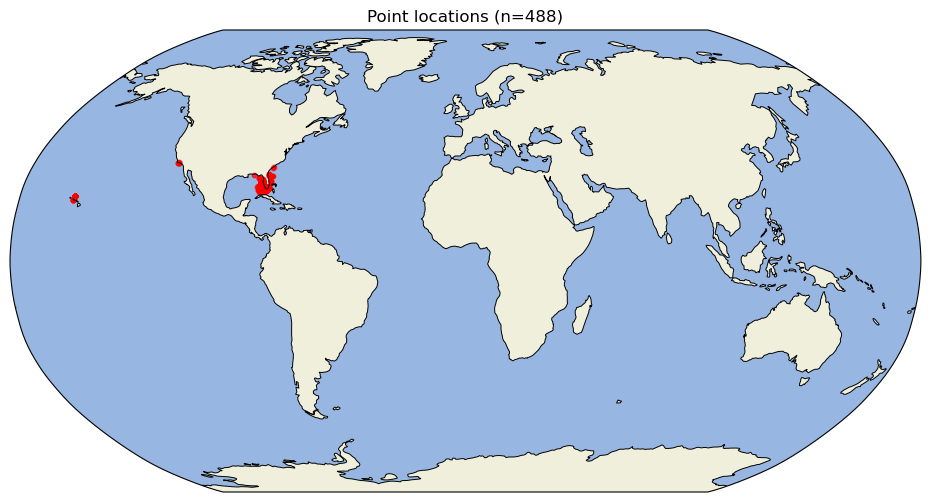

In [20]:
import matplotlib.pyplot as plt

# If your columns are named differently, change these:
lat_col = "lat"
lon_col = "lon"

# drop rows missing coords
pts = surface[["lat", "lon"]].dropna()

# --- Plot ---
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.coastlines(linewidth=0.7)

ax.scatter(
    pts[lon_col].values,
    pts[lat_col].values,
    s=10, alpha=0.7,
    color="red",
    transform=ccrs.PlateCarree()
)

ax.set_title(f"Point locations (n={len(pts)})")
plt.show()
